# CMT309/CMT315 - F2F Session 2
## Data Visualisation with `seaborn`, `plotly` and `ggplot` (13/02/2023 - Monday)

#### This example is constructed to remind you using `seaborn`, `plotly` and `ggplot` modules with examples of **data visualisation**. 

In [32]:
import pandas as pd
import numpy as np
from urllib import request
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *

In [33]:
module_url = f"https://raw.githubusercontent.com/fivethirtyeight/data/22a478af3edc00f69693c3f5f4604b2f1fd024b0/classic-rock/classic-rock-song-list.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

songs = pd.read_csv('classic-rock-song-list.csv')
songs = songs.fillna('')
songs = songs.rename(columns={"ARTIST CLEAN": "Artist", "Song Clean": "Song"})
songs = songs.drop(songs[songs['Release Year'] == 'SONGFACTS.COM'].index.values[0])

Fetching https://raw.githubusercontent.com/fivethirtyeight/data/22a478af3edc00f69693c3f5f4604b2f1fd024b0/classic-rock/classic-rock-song-list.csv


In [34]:
songs.head(3)

,Song,Artist,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85


## Q1) The Historical demand to classical rock songs

In this question, by using the songs data set, your are asked to make an analysis on the historical demand on classical rock songs. You need to make the analysis by using the columns of `Release Year` and `PlayCounts`. Some specific operations you need to perform are:

 - Use **`seaborn`** module and **`barplot()`** function.
 - Change color of the bars, do not use the default colors.
 - Add grids to the axis
 - Rotate x ticks to have a good visibility of years.
 - Set figure size to 5-15 inches height and width, respectively.
 
An example figure is given by:

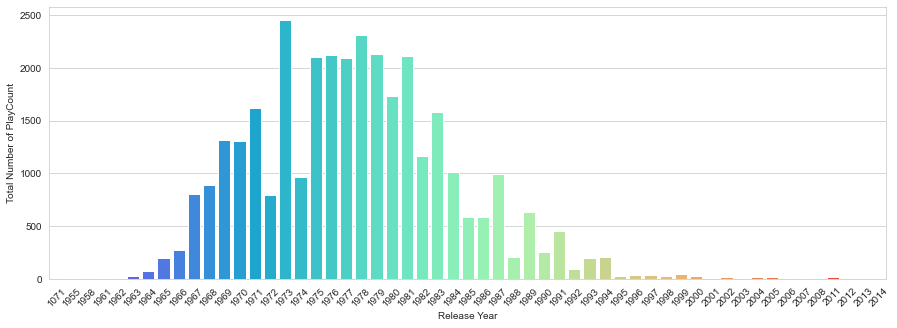

In [35]:
# Using seaborn and barplot group release year and Sum of PlayCounts, change the color of the bars to rainbow, add grids to the axis, rotate x ticks and figure size is 5 inches height and 15 inches width.

# Create new dataframe with Release Year and PlayCount and group by Release Year and sum number of PlayCounts
songs_year = songs[['Release Year', 'PlayCount']].groupby('Release Year').sum().reset_index()
# Drop the year which is null
songs_year = songs_year.drop(songs_year[songs_year['Release Year'] == ''].index.values[0])
# Plot the barplot
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.barplot(x='Release Year', y='PlayCount', data=songs_year, palette='rainbow')
plt.xticks(rotation=45)
plt.ylabel('Total Number of PlayCount')
plt.show()


## Q2) Most-played artists

First, crate a sub-dataframe which only includes artists (and their corresponding columns) have more than 500 number of plays. Then, by using `plotly.express`, create a pie chart to plot mostly played groups in percentages. An example figure is


In [36]:
# Create a new dataframe with artist and song and playcount and group by artist and sum playcounts
songs_artist = songs[['Artist', 'PlayCount']].groupby('Artist').sum().reset_index()
# Drop the Playcount less than 500 using loc
songs_artist = songs_artist.loc[songs_artist['PlayCount'] > 500]
# Sort the dataframe by PlayCount in descending order
songs_artist = songs_artist.sort_values(by='PlayCount', ascending=False)

# Using plotly express create a pie chart with Artist and PlayCount, set the title to Artist and PlayCount, set the color to Artist and set the hole to 0.3

fig = px.pie(songs_artist, values='PlayCount', names='Artist', width=1000, height=600 , title='Artist and PlayCount', color='Artist')
fig.show()

## Q3) `ggplot` puzzle for the 10 most played song

In this question, you are asked to re-organize the code parts below to create a logical `grammar of graphics` Python command which plots the figure below:


In [38]:
df = songs.copy()

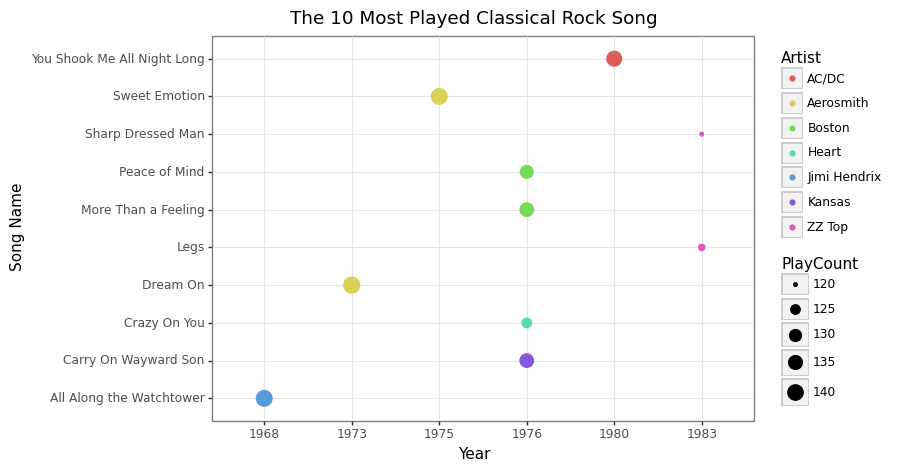

<ggplot: (120624161518)>

In [39]:
# Reorganise to plot the figure
c = df.loc[:, ['Song', 'Artist', 'Release Year', 'PlayCount']].nlargest(10, 'PlayCount')

(ggplot(c) 
+ aes(x="Release Year", y="Song",color="Artist", size="PlayCount") 
+ geom_point() + theme_bw() + xlab('Year') 
+ ylab('Song Name') + ggtitle("The 10 Most Played Classical Rock Song") 
+ theme(figure_size=(7, 5))
)